<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [ ]:
# Set your student number
student_number = 99109166
Name = 'Arman'
Last_Name = 'Lotfalikhani'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [2]:
import torch
import torchvision.datasets
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [139]:
train_set = torchvision.datasets.CIFAR10(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root='.', train=False, download=True, transform=transforms.ToTensor())
trainloader = DataLoader(train_set, 64, shuffle=True)
testloader = DataLoader(test_set, 64, shuffle=True)
image_shape = train_set[0][0].shape
input_dim = np.prod(image_shape).item()
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
'''Used from the pytorch website
Note that the prewritten code has used 'classes' in the last block, so there was no choice but to get the names
from the internet
Another note: the class label order is the same as numeric labels in the dataset
For example: class with label 0 (in the next block) is indeed a plane
'''
num_classes=10

Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


num_classes: 10 input_dim: 3072 image_shape: torch.Size([3, 32, 32])


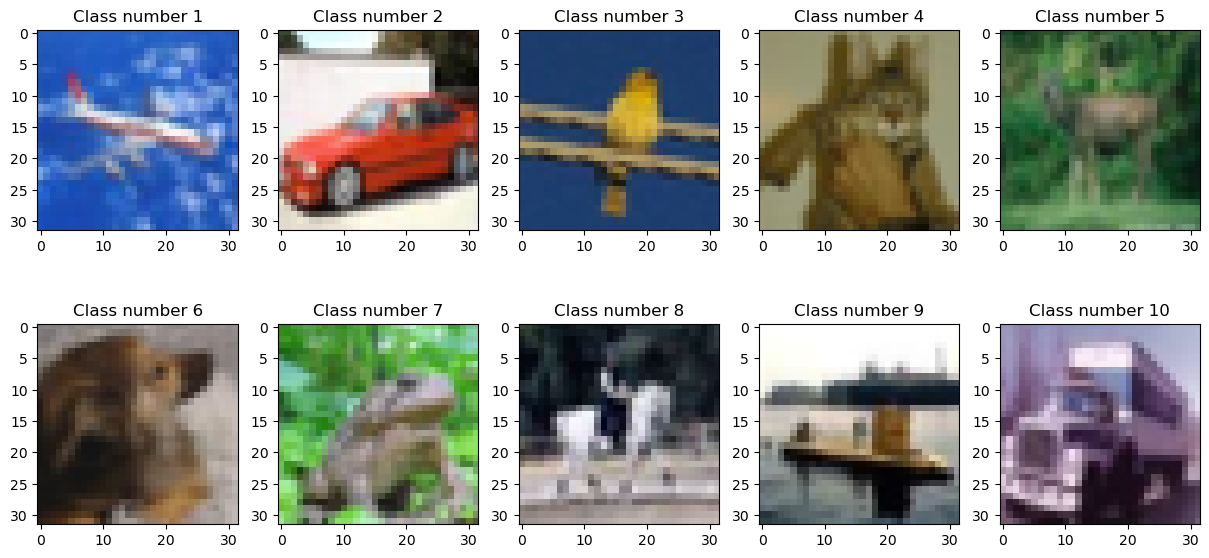

In [16]:
fig1,axs1=plt.subplots(2,5,figsize=(15,7))
rng=np.random.default_rng()
print('num_classes: %i input_dim: %i image_shape: %s'%(num_classes,input_dim,image_shape))
for i in range(10):
    index = rng.integers(len(train_set))
    image, label = train_set[index]
    while (label!=i):
        index = rng.integers(len(train_set))
        image, label = train_set[index]
    clone=image.clone()
    clone=clone.transpose(2,0)
    clone=clone.transpose(1,0)
    axs1[i//5][i%5].title.set_text("Class number %i" %(i+1))
    axs1[i//5][i%5].imshow(clone)
plt.show()

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [127]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,40,kernel_size=3,stride=1)#becomes 40 30*30 images
        self.avg_p1=nn.MaxPool2d(kernel_size=2,stride=2)# becomes 40 15*15
        self.conv2=nn.Conv2d(40,25,kernel_size=2,stride=1)#becomes 20 14*14
        self.avg_p2=nn.AvgPool2d(kernel_size=2,stride=2)#becomes 20 7*7
        #note: Average pooling can also be used, but we got  %higher accuracy with max pooling
        
        self.lin1=nn.Linear(25*7*7,300)
        self.lin2=nn.Linear(300,100)
        self.lin3=nn.Linear(100,10)
        ## FILL HERE

    def forward(self, x):
        x=F.leaky_relu(self.conv1(x))
        x=self.avg_p1(x)
        x=F.leaky_relu(self.conv2(x))
        x=self.avg_p2(x)
        x=F.leaky_relu(self.lin1(torch.flatten(x,1)))
        x=F.leaky_relu(self.lin2(x))
        x=self.lin3(x)
        ## FILL HERE
        return x

net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [128]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_func=nn.CrossEntropyLoss()
gpu_net=net.to(device)
optimizer=torch.optim.Adam(gpu_net.parameters())
## FILL HERE

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [129]:
epoch_nums = 20## Number of epochs
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        images=data[0].to(device)
        my_classes=data[1].to(device)
        
        logits=gpu_net(images)
        loss=loss_func(logits,my_classes)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        running_loss=running_loss+loss.item()/len(trainloader)
    print("Epoch: %i Running loss: %f"%(epoch,running_loss))
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch

print('Finished Training')

Epoch: 0 Running loss: 1.556449
Epoch: 1 Running loss: 1.167462
Epoch: 2 Running loss: 0.996667
Epoch: 3 Running loss: 0.863036
Epoch: 4 Running loss: 0.767692
Epoch: 5 Running loss: 0.676997
Epoch: 6 Running loss: 0.588069
Epoch: 7 Running loss: 0.507313
Epoch: 8 Running loss: 0.429954
Epoch: 9 Running loss: 0.354579
Epoch: 10 Running loss: 0.288293
Epoch: 11 Running loss: 0.229868
Epoch: 12 Running loss: 0.188499
Epoch: 13 Running loss: 0.147950
Epoch: 14 Running loss: 0.136172
Epoch: 15 Running loss: 0.111885
Epoch: 16 Running loss: 0.093247
Epoch: 17 Running loss: 0.093148
Epoch: 18 Running loss: 0.086184
Epoch: 19 Running loss: 0.081349
Finished Training


## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [130]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images_gpu=data[0].to(device)
        my_classes2_gpu=data[1].to(device)
        predictions=torch.argmax(gpu_net(images_gpu),1)
        correct+=torch.sum(torch.eq(predictions,my_classes2_gpu)).item()
        total+=len(predictions)

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 70 %


Here, we also calculate the model performance for each class as well.

In [144]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images_gpu=data[0].to(device)
        my_classes2_gpu=data[1].to(device)
        predictions=torch.argmax(gpu_net(images_gpu),1)
        n=len(predictions)
        for i in range(n):
            my_index=classes[predictions[i]]
            if predictions[i].item()==my_classes2_gpu[i].item():
                correct_pred[my_index]+=1
            total_pred[my_index]+=1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 70.9 %
Accuracy for class: car   is 76.2 %
Accuracy for class: bird  is 58.1 %
Accuracy for class: cat   is 52.5 %
Accuracy for class: deer  is 63.7 %
Accuracy for class: dog   is 67.6 %
Accuracy for class: frog  is 76.9 %
Accuracy for class: horse is 82.2 %
Accuracy for class: ship  is 79.9 %
Accuracy for class: truck is 77.5 %
